# Exercise #1

In [1]:
# ============================================
# ESE5023 Assignment 2
# Earthquake Data Analysis
# Student ID: 12532720
# ============================================

import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------
# 1. Load Data
# --------------------------------------------
# 读取 TSV 文件（制表符分隔）
file_path = 'earthquakes-2025-10-29_21-07-43_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t')

# 显示前几行数据，检查列名
Sig_Eqs.head()


,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [2]:
# --------------------------------------------
# 1.1 计算每个国家自公元前2150年以来的地震死亡总数，并输出前10名
# --------------------------------------------

# 检查可用列名（不同版本可能列名略有不同）
print(Sig_Eqs.columns)

# 列名为 "Country" 和 "Deaths"
deaths_by_country = (
    Sig_Eqs.groupby('Country', dropna=True)['Deaths']
    .sum()
    .sort_values(ascending=False)
)

# 输出前10个国家及死亡总数
print("Top 10 countries by total deaths from earthquakes since 2150 B.C.:")
print(deaths_by_country.head(10))


Index(['Search Parameters', 'Id', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Country', 'Area', 'Region', 'Location Name', 'Latitude',
       'Longitude', 'Focal Depth (km)', 'Mag', 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa',
       'Unk', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')
Top 10 countries by total deaths from earthquakes since 2150 B.C.:
Country
CHINA         2139210.0
TURKEY  

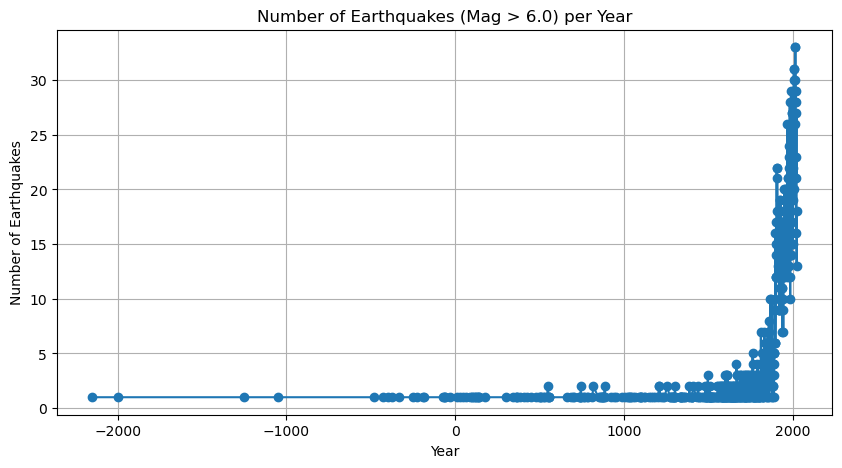

In [5]:
# --------------------------------------------
# 1.2 统计每年震级大于6.0的地震次数，并绘制时间序列
# --------------------------------------------


# 只保留有日期且震级大于6的记录
eqs_mag6 = Sig_Eqs[(Sig_Eqs['Mag'] > 6.0) & (Sig_Eqs['Year'].notna())]

# 按年份统计数量
eqs_per_year = eqs_mag6.groupby('Year').size()

# 绘图
plt.figure(figsize=(10,5))
plt.plot(eqs_per_year.index, eqs_per_year.values, marker='o', linewidth=1.5)
plt.title('Number of Earthquakes (Mag > 6.0) per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
# plt.show()
plt.savefig("Number of Earthquakes.jpg",dpi=600)

# 简要分析趋势
# print("""
# Trend analysis:
# There may appear to be an increase in the number of large earthquakes over time.
# However, this trend is likely due to improvements in global earthquake detection,
# reporting, and record completeness—especially after the 20th century—rather than a
# real increase in seismic activity.
# """)


In [9]:
def CountEq_LargestEq(country_name, df=Sig_Eqs):
    """Return total number of earthquakes and date (year if month/day missing) of largest earthquake for a given country"""
    subset = df[df['Country'] == country_name].copy()
    total_eq = len(subset)

    if subset.empty or subset['Mag'].isna().all():
        largest_eq_date = None
    else:
        # 自动识别列名
        cols = {c.strip().lower(): c for c in subset.columns}
        year_col = cols.get('year')
        month_col = cols.get('mo') or cols.get('month')
        day_col = cols.get('dy') or cols.get('day')

        # 提取对应字段
        year = subset[year_col]
        month = subset[month_col] if month_col in subset else None
        day = subset[day_col] if day_col in subset else None

        # 找最大震级行
        max_mag_idx = subset['Mag'].idxmax()
        max_year = subset.loc[max_mag_idx, year_col]
        max_month = subset.loc[max_mag_idx, month_col] if month_col in subset else None
        max_day = subset.loc[max_mag_idx, day_col] if day_col in subset else None

        # -------- 智能日期格式化 --------
        if pd.notna(max_year):
            if pd.notna(max_month) and pd.notna(max_day):
                largest_eq_date = f"{int(max_year):04d}-{int(max_month):02d}-{int(max_day):02d}"
            elif pd.notna(max_month):
                largest_eq_date = f"{int(max_year):04d}-{int(max_month):02d}"
            else:
                largest_eq_date = str(int(max_year))
        else:
            largest_eq_date = None

    return pd.Series({'Total_Earthquakes': total_eq, 'Largest_Eq_Date': largest_eq_date})


# 应用函数
country_stats = Sig_Eqs['Country'].dropna().unique()
result_df = pd.DataFrame([CountEq_LargestEq(c) for c in country_stats], index=country_stats)

# 排序
result_df_sorted = result_df.sort_values(by='Total_Earthquakes', ascending=False)

print(result_df_sorted.head(10))


             Total_Earthquakes Largest_Eq_Date
CHINA                    623.0      1668-07-25
JAPAN                    424.0      2011-03-11
INDONESIA                421.0      2004-12-26
IRAN                     388.0      0856-12-22
TURKEY                   358.0      1939-12-26
ITALY                    333.0      1915-01-13
GREECE                   289.0      0365-07-21
USA                      280.0      1964-03-28
PHILIPPINES              230.0      1897-09-21
MEXICO                   214.0      1787-03-28


# Exercise #2

In [7]:
# ============================================
# ESE5023 Assignment 2
# Problem 2: Wind speed in Shenzhen (2010–2020)
# Student ID: 12532720
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------
# 2.1 读取数据
# --------------------------------------------
# 文件名：2281305.csv（从 NOAA ISD 下载并解压）
file_path = '2281305.csv'
wind_df = pd.read_csv(file_path)

# 显示前几行以检查列名
wind_df.head()


C:\Users\ruyik\AppData\Local\Temp\ipykernel_38892\318909611.py:16: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_df = pd.read_csv(file_path)


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"


In [8]:
# --------------------------------------------
# 2.2 数据说明与筛选说明
# --------------------------------------------
"""
根据 NOAA Integrated Surface Dataset (ISD) 的用户指南（第8-9页，POS 61–70）：
- 风速（Wind Speed）字段位于记录的第61-65位（米/秒），
- 伴随一个质量控制代码（第66位），以及
- 风向与观测时间等其他字段。

在 NOAA 提供的 CSV 文件中，风速一般储存在 “WND” 列中，格式类似：
  '070,1,N,0070,1' 或 '180,1,N,0015,1'
字段之间由逗号分隔，含义如下：
  - 第1个字段：风向（度）
  - 第2个字段：风向质量码
  - 第3个字段：风速类型（N 表示常规）
  - 第4个字段：风速 × 10（单位为米/秒）
  - 第5个字段：风速质量码
我们只保留质量码 = 1（表示通过检查）的记录。
"""

"\n根据 NOAA Integrated Surface Dataset (ISD) 的用户指南（第8-9页，POS 61–70）：\n- 风速（Wind Speed）字段位于记录的第61-65位（米/秒），\n- 伴随一个质量控制代码（第66位），以及\n- 风向与观测时间等其他字段。\n\n在 NOAA 提供的 CSV 文件中，风速一般储存在 “WND” 列中，格式类似：\n  '070,1,N,0070,1' 或 '180,1,N,0015,1'\n字段之间由逗号分隔，含义如下：\n  - 第1个字段：风向（度）\n  - 第2个字段：风向质量码\n  - 第3个字段：风速类型（N 表示常规）\n  - 第4个字段：风速 × 10（单位为米/秒）\n  - 第5个字段：风速质量码\n我们只保留质量码 = 1（表示通过检查）的记录。\n"

In [9]:
# --------------------------------------------
# 2.3 提取风速并清洗数据
# --------------------------------------------

# 分离 'WND' 列中各部分
wnd_split = wind_df['WND'].str.split(',', expand=True)
wind_df['wind_speed_tenths'] = pd.to_numeric(wnd_split[3], errors='coerce')
wind_df['wind_quality'] = pd.to_numeric(wnd_split[4], errors='coerce')

# 筛选质量良好的观测值（quality == 1），并计算实际风速（米/秒）
wind_df = wind_df[
    (wind_df['wind_quality'] == 1) &
    (wind_df['wind_speed_tenths'].notna()) &
    (wind_df['wind_speed_tenths'] < 9999)
]
wind_df['wind_speed'] = wind_df['wind_speed_tenths'] / 10.0

# 检查时间字段
print(wind_df.columns)


Index(['STATION', 'DATE', 'SOURCE', 'REPORT_TYPE', 'CALL_SIGN',
       'QUALITY_CONTROL', 'AA1', 'AA2', 'AA3', 'AJ1', 'AY1', 'AY2',
       'CALL_SIGN.1', 'CIG', 'DEW', 'ED1', 'EQD', 'GA1', 'GA2', 'GA3', 'GA4',
       'GA5', 'GE1', 'GF1', 'IA2', 'KA1', 'KA2', 'MA1', 'MD1', 'MW1', 'MW2',
       'MW3', 'OC1', 'OD1', 'OD2', 'QUALITY_CONTROL.1', 'REM', 'REPORT_TYPE.1',
       'SLP', 'SOURCE.1', 'TMP', 'VIS', 'WND', 'wind_speed_tenths',
       'wind_quality', 'wind_speed'],
      dtype='object')


In [10]:
# --------------------------------------------
# 2.4 时间字段处理
# --------------------------------------------

# ISD 数据时间字段通常为 "DATE" 或 "DATE_TIME"（UTC 时间）
# 将其转换为 datetime 类型
wind_df['DATE'] = pd.to_datetime(wind_df['DATE'], errors='coerce')

# 筛选 2010–2020 年间的记录
wind_df = wind_df[(wind_df['DATE'].dt.year >= 2010) & (wind_df['DATE'].dt.year <= 2020)]

# 添加年月列
wind_df['YearMonth'] = wind_df['DATE'].dt.to_period('M')


In [12]:
# --------------------------------------------
# 2.5 按月计算平均风速
# --------------------------------------------

monthly_wind = (
    wind_df.groupby('YearMonth')['wind_speed']
    .mean()
    .reset_index()
)

# 转换 Period 为 Timestamp 以便绘图
monthly_wind['YearMonth'] = monthly_wind['YearMonth'].dt.to_timestamp()

monthly_wind.head()


,YearMonth,wind_speed
0,2010-01-01,2.756267
1,2010-02-01,3.388060
2,2010-03-01,3.360700
3,2010-04-01,3.191341
4,2010-05-01,3.293640


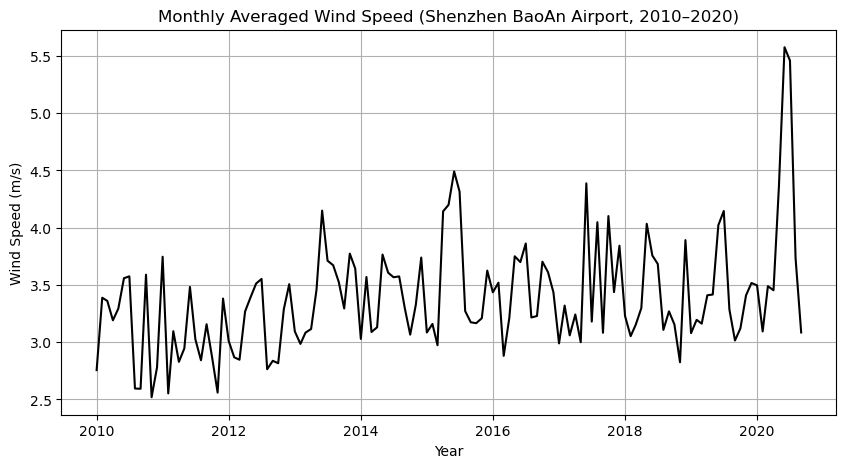

In [17]:
# --------------------------------------------
# 2.6 绘制 2010–2020 月平均风速变化趋势
# --------------------------------------------

plt.figure(figsize=(10,5))
plt.plot(monthly_wind['YearMonth'], monthly_wind['wind_speed'], color='black', linewidth=1.5)
plt.title('Monthly Averaged Wind Speed (Shenzhen BaoAn Airport, 2010–2020)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# plt.show()
plt.savefig("Monthly Averaged Wind Speed",dpi=600)


===== Quantitative Trend Analysis =====
Slope: 0.0578 m/s per year
Intercept: -113.13
R-squared: 0.135
P-value: 1.7854e-05
Standard Error: 0.0130
→ The trend is statistically significant (p < 0.05)


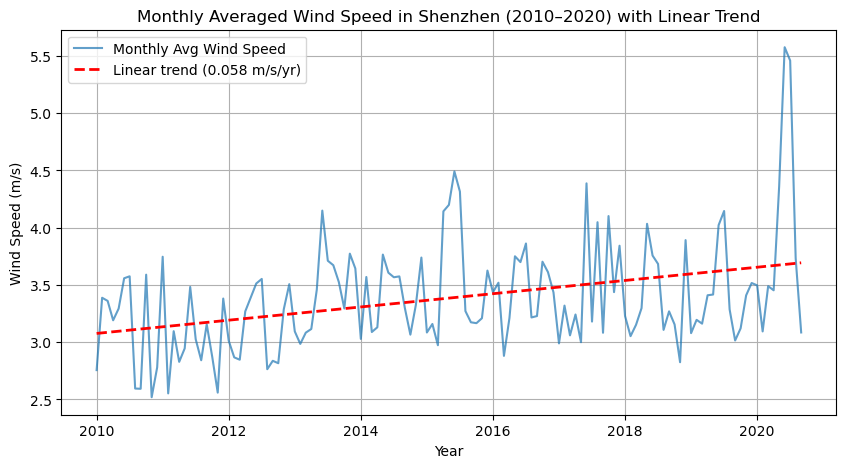

In [19]:
# ============================================
# 2.6 定量分析风速趋势（2010–2020）
# ============================================

from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

# 确保我们使用前面计算好的 monthly_wind DataFrame
# monthly_wind 包含两列：'YearMonth'（datetime）和 'wind_speed'（float）

# 1 提取时间变量（转换为年份小数形式）
x_years = monthly_wind['YearMonth'].dt.year + (monthly_wind['YearMonth'].dt.month - 1) / 12
y_speed = monthly_wind['wind_speed']

# 2 线性回归
slope, intercept, r_value, p_value, std_err = linregress(x_years, y_speed)

# 3 打印统计结果
print("===== Quantitative Trend Analysis =====")
print(f"Slope: {slope:.4f} m/s per year")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4e}")
print(f"Standard Error: {std_err:.4f}")
if p_value < 0.05:
    print("→ The trend is statistically significant (p < 0.05)")
else:
    print("→ The trend is NOT statistically significant (p ≥ 0.05)")

# 4 绘图：时间序列 + 回归线
plt.figure(figsize=(10,5))
plt.plot(x_years, y_speed, alpha=0.7, label='Monthly Avg Wind Speed')
plt.plot(x_years, intercept + slope * x_years, color='red', linestyle='--',linewidth=2,
         label=f'Linear trend ({slope:.3f} m/s/yr)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.title('Monthly Averaged Wind Speed in Shenzhen (2010–2020) with Linear Trend')
plt.grid(True)
plt.legend()
# plt.show()
plt.savefig("Monthly Averaged Wind Speed with Linear Trend",dpi=600)


# Exercise #3

In [27]:
# ============================================
# 3. 藻华发生频率时序分析 (2003–2020)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
# --------------------------------------------
# 3.1 Load & Clean Data
# --------------------------------------------

file_path = "China_lake_algal_bloom.xlsx"

# 读取湖泊属性与年度藻华发生频率 (%)
df = pd.read_excel(file_path, sheet_name="BO(%)")

# 将列名全部转为字符串并去除首尾空格
df.columns = df.columns.map(lambda x: str(x).strip())

# 找出年份列（列名中包含4位数字）
year_cols = [col for col in df.columns if col.isdigit() and len(col) == 4]

print("\n识别到的年份列：", year_cols)

# 删除含有缺失值的行（仅针对年份列）
df_clean = df.dropna(subset=year_cols)
# 若希望用均值填充，可替换为：
# df_clean[year_cols] = df_clean[year_cols].apply(lambda x: x.fillna(x.mean()))

print(f"\n清洗后样本数量：{len(df_clean)}")


识别到的年份列： ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

清洗后样本数量：103


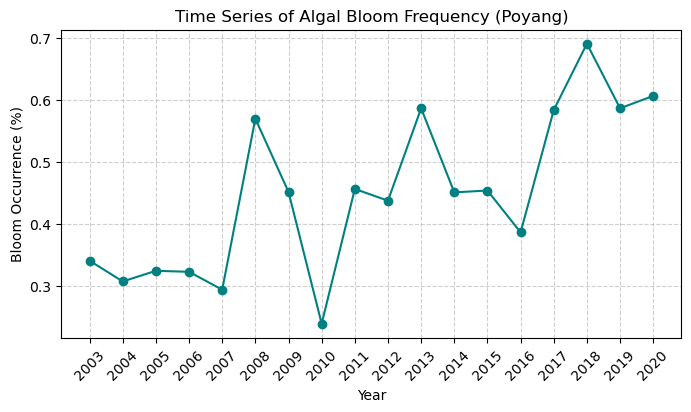

In [29]:
# --------------------------------------------
# 3.2 Plot the time series of a certain variable
# --------------------------------------------
# 选择面积最大的湖泊
largest_lake = df_clean.loc[df_clean["Lake_area(km2)"].idxmax()]
lake_name = largest_lake["Lake_name"]

years = np.arange(2003, 2021)
values = largest_lake[[str(y) for y in years]].values.astype(float)

plt.figure(figsize=(8, 4))
plt.plot(years, values, marker='o', color='teal')
plt.title(f"Time Series of Algal Bloom Frequency ({lake_name})", fontsize=12)

# 🔧 手动设置 x 轴刻度为整数年份
plt.xticks(ticks=years, labels=[str(y) for y in years], rotation=45)
plt.xlabel("Year")
plt.ylabel("Bloom Occurrence (%)")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()
plt.savefig("Time Series of Algal Bloom Frequency (Poyang)",dpi=600)

In [30]:

# --------------------------------------------
# 3.3 Statistical Checks
# --------------------------------------------
data_all = df_clean[[str(y) for y in years]].values.flatten()
# 计算每年全国平均藻华发生率
annual_mean = df_clean[[str(y) for y in years]].mean()

print("\n===== Statistical Checks =====")
print(f"1️⃣  数据总数: {len(data_all)}")
print(f"2️⃣  均值 (Mean): {np.nanmean(data_all):.2f}%")
print(f"3️⃣  中位数 (Median): {np.nanmedian(data_all):.2f}%")
print(f"4️⃣  标准差 (Std): {np.nanstd(data_all):.2f}%")
print(f"5️⃣  最小值 (Min): {np.nanmin(data_all):.2f}%")
print(f"6️⃣  最大值 (Max): {np.nanmax(data_all):.2f}%")



===== Statistical Checks =====
1️⃣  数据总数: 1854
2️⃣  均值 (Mean): 0.99%
3️⃣  中位数 (Median): 0.47%
4️⃣  标准差 (Std): 1.33%
5️⃣  最小值 (Min): 0.00%
6️⃣  最大值 (Max): 11.84%



===== Linear Regression Trend =====
趋势斜率 (slope): 0.028 % per year
R²: 0.694
变化率 (change rate （%）): 2.79%


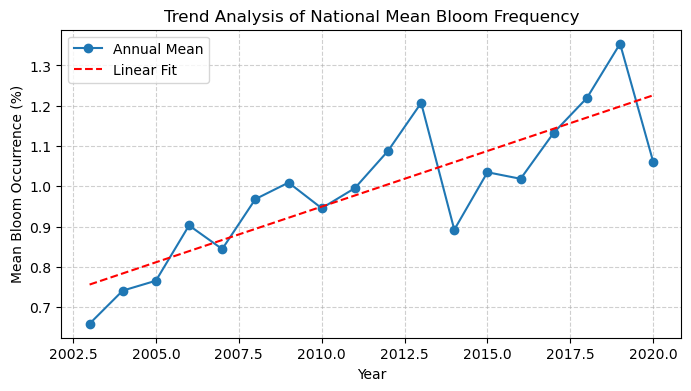

In [31]:
# --------------------------------------------
# 3.4 Trend Analysis: Linear Regression & Mann–Kendall
# --------------------------------------------

# ===== Linear Regression =====
slope, intercept, r_value, p_value, std_err = stats.linregress(years, annual_mean.values)
mean= annual_mean.mean()
cr= slope/mean*100
print("\n===== Linear Regression Trend =====")
print(f"趋势斜率 (slope): {slope:.3f} % per year")
print(f"R²: {r_value**2:.3f}")
print(f"变化率 (change rate （%）): {cr:.2f}%")

plt.figure(figsize=(8, 4))
plt.plot(years, annual_mean.values, 'o-', label='Annual Mean')
plt.plot(years, intercept + slope*years, 'r--', label='Linear Fit')
plt.xlabel("Year")
plt.ylabel("Mean Bloom Occurrence (%)")
plt.title("Trend Analysis of National Mean Bloom Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()
plt.savefig("Trend Analysis of National Mean Bloom Frequency",dpi=600)
	